# Lab 2 - Implementing Linear Regression Model

**Date: 25 April 2024**

**Problem Statement:** Use Scikit Learn to implement a Linear Regression Model that predicts average per capita life satisfaction index for a Country/Region given its GDP per capita value. Make use of OECD Better Life Index data along with IMF's GDP per capita data to train the Linear Regression Model.

Finally predict life satisfaction value for a region/country whose OECD BLI value is not in the training data on the basis of its GDP per capita.

In [1]:
## Code to understand how 'pivot' function of Pandas work
import pandas as pd
import numpy as np
df = pd.DataFrame({'foo':['one', 'one', 'one','two','two','two'],
                   'bar': ['A', 'B', 'C', 'A','B','C'],
                   'baz':[1,2,3,4,5,6],
                   'zoo':['x','y','z','q','w','t']})
print('Original Dataframe')
print(df)
print('\n')
print('Reshaped Dataframe after pivot')
print(df.pivot(index='foo', columns='bar',values='baz'))
print('\n')

Original Dataframe
   foo bar  baz zoo
0  one   A    1   x
1  one   B    2   y
2  one   C    3   z
3  two   A    4   q
4  two   B    5   w
5  two   C    6   t


Reshaped Dataframe after pivot
bar  A  B  C
foo         
one  1  2  3
two  4  5  6




The below function merges the OECD's life satisfaction data and the IMF's GDP per capita data

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015":"GDP per capita"},inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0,1,6,8,33,34,35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita","Life satisfaction"]].iloc[keep_indices]

In [3]:
import os
datapath = os.path.join("datasets","lifesat","")

In [4]:
# To plot pretty figures directly within Jupyter
import matplotlib as mpl
mpl.rc('axes',labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

**Step 1:**
Download the OECD life satisfaction csv and GDP per capita csv from the respective web sources.

In [5]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv","gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

**Step 2:** Load the csv files for OECD BLI Index data and IMF's GDP per capita data into respective pandas data frames.

Merge it into a single dataframe after pivoting the data having Country column as index.

Visualize the correlation between GDP per capita with Life Satisfaction index using scatter plot.

Finally build, train and use the Scikit Learn's Linear Regression Model using the data.

In [10]:
# Code Example
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands=',', delimiter='\t'
                              , encoding='latin1',na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli,gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print(country_stats.head())
print(X)


                 GDP per capita  Life satisfaction
Country                                           
Russia                 9054.914                6.0
Turkey                 9437.372                5.6
Hungary               12239.894                4.9
Poland                12495.334                5.8
Slovak Republic       15991.736                6.1
[[ 9054.914]
 [ 9437.372]
 [12239.894]
 [12495.334]
 [15991.736]
 [17288.083]
 [18064.288]
 [19121.592]
 [20732.482]
 [25864.721]
 [27195.197]
 [29866.581]
 [32485.545]
 [35343.336]
 [37044.891]
 [37675.006]
 [40106.632]
 [40996.511]
 [41973.988]
 [43331.961]
 [43603.115]
 [43724.031]
 [43770.688]
 [49866.266]
 [50854.583]
 [50961.865]
 [51350.744]
 [52114.165]
 [55805.204]]


<Axes: xlabel='GDP per capita', ylabel='Life satisfaction'>

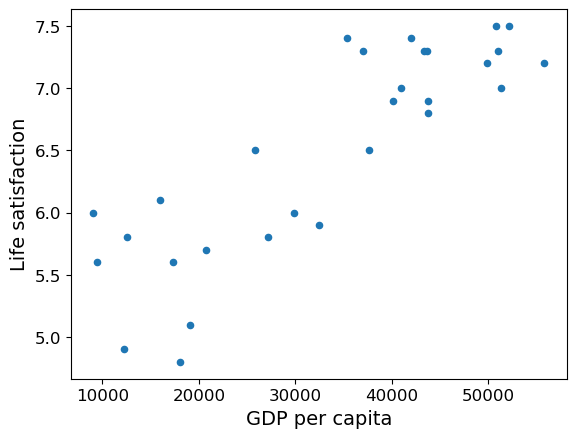

In [7]:

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")



In [8]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X,y)



LinearRegression()

In [9]:
# Make a prediction for Cyprus
X_new = [[22587]] # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[5.96242338]]

[[5.96242338]]
